In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
parameter = 30
data = pd.DataFrame(index = range(0,parameter),columns = ('probability','The true label'))
data['The true label'] = np.random.randint(0,2,size = len(data))
data['probability'] = np.random.choice(np.arange(0.1,1,0.1),len(data['probability']))
data#random库随机生成数据

,probability,The true label
0,0.7,1
1,0.2,0
2,0.9,1
3,0.6,1
4,0.7,1
5,0.8,0
6,0.7,1
7,0.6,1
8,0.8,0
9,0.4,0


In [9]:
#计算混淆矩阵（计数）
cm = np.arange(4).reshape(2,2)
cm[0,0] = len(data[data['The true label']==0][data['probability']<0.5])#TN
cm[0,1] = len(data[data['The true label']==0][data['probability']>=0.5])#FP
cm[1,0] = len(data[data['The true label']==1][data['probability']<0.5])#FN
cm[1,1] = len(data[data['The true label']==1][data['probability']>=0.5])#TP

c:\python27\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\python27\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\python27\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
c:\python27\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


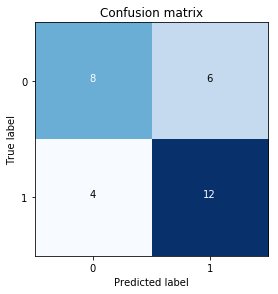

In [18]:
import itertools#自带
classes = [0,1]
plt.figure()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title('Confusion matrix')
#画方块
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks,classes,rotation = 0)
plt.yticks(tick_marks,classes)
thresh = cm.max()/2
for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [20]:
data.sort_values('probability',inplace=True, ascending=False)
data

,probability,The true label
2,0.9,1
21,0.9,0
26,0.9,1
29,0.8,1
8,0.8,0
5,0.8,0
17,0.8,1
0,0.7,1
6,0.7,1
4,0.7,1


In [22]:
TPRandFPR = pd.DataFrame(index=range(len(data)),columns=('TP','FP'))
for j in range(len(data)):
    data1 = data.head(n=j+1)
    FP=len(data1[data1['The true label']==0][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==0]))
    TP=len(data1[data1['The true label']==1][data1['probability']>=data1.head(len(data1))['probability']])/float(len(data[data['The true label']==1]))
    TPRandFPR.iloc[j]=[TP,FP]
TPRandFPR    

c:\python27\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
c:\python27\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,TP,FP
0,0.0625,0
1,0.0625,0.0714286
2,0.125,0.0714286
3,0.1875,0.0714286
4,0.1875,0.142857
5,0.1875,0.214286
6,0.25,0.214286
7,0.3125,0.214286
8,0.375,0.214286
9,0.4375,0.214286


In [23]:
#threshold依次取0.9,0.9,0.9,0.8……
from sklearn.metrics import auc

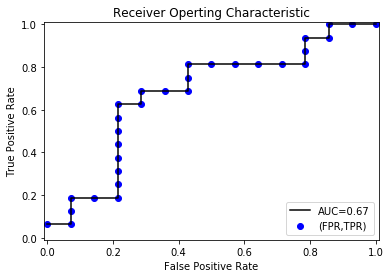

In [26]:
AUC = auc(TPRandFPR['FP'],TPRandFPR['TP'])
plt.scatter(x=TPRandFPR['FP'],y=TPRandFPR['TP'],label='(FPR,TPR)',color='b')
plt.plot(TPRandFPR['FP'],TPRandFPR['TP'],'k',label='AUC=%0.2f'%AUC)
plt.legend(loc='lower right')
plt.title('Receiver Operting Characteristic')
plt.plot((0,0),(1,1),'r--')
plt.xlim([-0.01,1.01])
plt.ylim([-0.01,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()